In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

/home/abhishek/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/abhishek/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/abhishek/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/abhishek/anaconda3/envs/tf2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# 8. In this exercise, we will generate simulated data, and will then use this data to perform best subset 
# selection.

# (a) Use the rnorm() function to generate a predictor X of length n = 100, as well as a noise vector  of 
# length n = 100.

np.random.seed(1)

X = np.random.randn(100)
eps = np.random.randn(100)
X.shape


(100,)

In [3]:
# (b) Generate a response vector Y of length n = 100 according to the model Y = β0 + β1X + β2X2 + β3X3 + eps

# weights are of our choice
beta = [3,4,2,1]
Y = beta[0] + beta[1]*X + beta[2]*X**2 + beta[3]*X**3 + eps

In [7]:
poly = PolynomialFeatures(10, include_bias = False)
predictors = poly.fit_transform(pd.DataFrame({'X': X}))
predictors = pd.DataFrame(predictors)
col = ['X' + str(i) for i in range(1, 11)]
predictors.columns = col
predictors.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1.624345,2.638498,4.285832,6.961671,11.308158,18.368354,29.836551,48.464863,78.723675,127.874436
1,-0.611756,0.374246,-0.228947,0.140060,-0.085683,0.052417,-0.032066,0.019617,-0.012001,0.007342
2,-0.528172,0.278965,-0.147342,0.077822,-0.041103,0.021710,-0.011466,0.006056,-0.003199,0.001689
3,-1.072969,1.151262,-1.235268,1.325403,-1.422116,1.525886,-1.637228,1.756694,-1.884878,2.022415
4,0.865408,0.748930,0.648130,0.560897,0.485404,0.420073,0.363534,0.314605,0.272262,0.235617


In [8]:
def fit_linear_reg(X, Y):
    # Fit LR model and return RSS and R-squared values
    X = sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    
    return model.ssr, model.rsquared, model

from tqdm import tnrange, tqdm_notebook
from itertools import combinations

def run_subset_selection(X, y):
    # initialization variables
    RSS_list, R_squared_list, feature_list = [], [], []
    aic_list, bic_list, adj_r_squared_list = [], [], []
    numb_features = []
    
    # Looping over k = 1 to k = 11 features in X
    for k in tnrange(1, len(X.columns) + 1, desc = 'Loop...'):
        best_features, best_RSS, best_r2, best_model = None, None, 0, None
        
        # Looping over all possible combinations
        for combo in combinations(X.columns, k):
            tmp_result = fit_linear_reg(X[list(combo)], Y) # store temp result
            r2 = tmp_result[1]
            
            if r2 > best_r2:
                best_features = combo
                best_RSS = tmp_result[0]
                best_r2 = tmp_result[1]
                best_model = tmp_result[2]
                
        RSS_list.append(best_RSS)
        R_squared_list.append(best_r2)
        feature_list.append(best_features)
        numb_features.append(len(best_features))
        aic_list.append(best_model.aic)
        bic_list.append(best_model.bic)
        adj_r_squared_list.append(best_model.rsquared_adj)
    
    # store in df
    df = pd.DataFrame({'numb_features': numb_features, 'RSS': RSS_list, 'R_squared': R_squared_list,
                      'AIC': aic_list, 'BIC': bic_list, 'adj_r2': adj_r_squared_list, 'features': feature_list})
    
    return df

In [12]:
best_subset_results = run_subset_selection(predictors, Y)

/home/abhishek/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


In [13]:
best_subset_results

,numb_features,RSS,R_squared,AIC,BIC,adj_r2,features
0,1,771.612854,0.819633,492.118982,497.329322,0.817793,"(X1,)"
1,2,329.558323,0.922965,409.046022,416.861533,0.921376,"(X1, X2)"
2,3,84.811563,0.980175,275.313877,285.734557,0.979556,"(X1, X2, X3)"
3,4,79.800246,0.981346,271.223347,284.249198,0.980561,"(X1, X2, X3, X6)"
4,5,79.446732,0.981429,272.779363,288.410385,0.980441,"(X1, X2, X3, X8, X10)"
5,6,77.901340,0.981790,272.815004,291.051195,0.980616,"(X1, X2, X5, X7, X8, X9)"
6,7,77.535196,0.981876,274.343886,295.185248,0.980497,"(X1, X2, X3, X5, X7, X9, X10)"
7,8,77.090698,0.981980,275.768950,299.215482,0.980396,"(X1, X2, X3, X4, X5, X6, X7, X9)"
8,9,76.794677,0.982049,277.384221,303.435923,0.980254,"(X1, X2, X4, X5, X6, X7, X8, X9, X10)"
9,10,76.498124,0.982118,278.997310,307.654182,0.980109,"(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10)"


In [14]:
print('The best model according to adjR2 is model having features - ',
      best_subset_results.sort_values('adj_r2',ascending=False)['numb_features'].values[0],
     )
print('The best model according to AIC is model having features - ',
      best_subset_results.sort_values('AIC',ascending=True)['numb_features'].values[0])
print('The best model according to BIC is model having features - ',
      best_subset_results.sort_values('BIC',ascending=True)['numb_features'].values[0])

# we can see that using different metrics can give us different outcomes, althuohg what we will observe is that 
# AIC and BIC will give us similar results

The best model according to adjR2 is model having features -  6
The best model according to AIC is model having features -  4
The best model according to BIC is model having features -  4


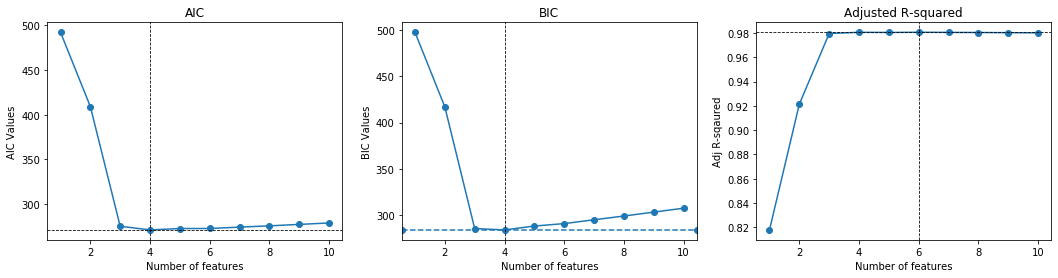

In [19]:
def plot_results(df):
    fig, (a1, a2, a3) = plt.subplots(1,3, figsize = (18, 4))
    a1.plot(df['numb_features'], df['AIC'], marker = 'o')
    a1.axhline(y = min(df['AIC']), linestyle = 'dashed', linewidth = 0.8, color = 'black')
    a1.axvline(x = df.sort_values('AIC', ascending = True)['numb_features'].values[0], color = 'black',
               linestyle = 'dashed', linewidth = 0.8)
    a1.set_title('AIC')
    a1.set_xlabel('Number of features')
    a1.set_ylabel('AIC Values')
    
    a2.plot(df['numb_features'], df['BIC'], marker = 'o')
    a2.axhline(y = min(df['BIC']), linestyle = 'dashed', marker = 'o')
    a2.axvline(x = df.sort_values('BIC', ascending = True)['numb_features'].values[0], color = 'black',
              linestyle = 'dashed', linewidth = 0.8)
    a2.set_title('BIC')
    a2.set_xlabel('Number of features')
    a2.set_ylabel('BIC Values')
    
    a3.plot(df['numb_features'], df['adj_r2'], marker = 'o')
    a3.axhline(y = max(df['adj_r2']), linestyle = 'dashed', linewidth = 0.8, color = 'black')
    a3.axvline(x = df.sort_values('adj_r2', ascending = False)['numb_features'].values[0], color = 'black',
               linestyle = 'dashed', linewidth = 0.8)
    a3.set_title('Adjusted R-squared')
    a3.set_xlabel('Number of features')
    a3.set_ylabel('Adj R-sqaured')

plot_results(best_subset_results)

In [20]:
print('Features choosen by AIC ',list(best_subset_results['features'][3]))
print('Features choosen by BIC ',list(best_subset_results['features'][3]))
print('Features choosen by adj_r2 ',list(best_subset_results['features'][6]))

Features choosen by AIC  ['X1', 'X2', 'X3', 'X6']
Features choosen by BIC  ['X1', 'X2', 'X3', 'X6']
Features choosen by adj_r2  ['X1', 'X2', 'X3', 'X5', 'X7', 'X9', 'X10']


In [ ]:
# (d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your 
# answer compare to the results in (c)?

